# Módulo 2 - Python Data Science

# 1. Exploração de Pandas

O Pandas fornece uma série de ferramentas, métodos e funcionalidades úteis além das 3 estruturas de dados fundamentais: 
- Series, 
- DataFrames 
- Index


## 1.1 Series

In [1]:
# usamos por convenção np para Numpy
# usamos por convenção pd para Pandas
import numpy as np
import pandas as pd

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
del data[2]

In [6]:
data.index

Index([0, 1, 3], dtype='int64')

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
population_dict = {'Lisboa': 544325,'Sintra': 385989, 'Vila Nova de Gaia': 304233,
                   'Porto': 231834, 'Cascais': 214239, 'Loures': 201349,
                   'Braga': 193324, 'Almada': 177943}
population = pd.Series(population_dict)
population

Lisboa               544325
Sintra               385989
Vila Nova de Gaia    304233
Porto                231834
Cascais              214239
Loures               201349
Braga                193324
Almada               177943
dtype: int64

In [10]:
population['Braga']

193324

In [11]:
population['Braga'] = 201000

In [12]:
population['Braga']

201000

## 1.2 DataFrames

In [13]:
area_dict = {'Lisboa': 100.1,'Sintra': 23.8, 'Vila Nova de Gaia': 56.3,
                   'Porto': 41.4, 'Cascais': 97.1, 'Loures': 11.8,
                   'Braga': 41, 'Almada': 14.7}
area = pd.Series(area_dict)
area

Lisboa               100.1
Sintra                23.8
Vila Nova de Gaia     56.3
Porto                 41.4
Cascais               97.1
Loures                11.8
Braga                 41.0
Almada                14.7
dtype: float64

In [14]:
cities = pd.DataFrame({'population': population,
                       'area': area})
cities

,population,area
Lisboa,544325,100.1
Sintra,385989,23.8
Vila Nova de Gaia,304233,56.3
Porto,231834,41.4
Cascais,214239,97.1
Loures,201349,11.8
Braga,201000,41.0
Almada,177943,14.7


## 1.3 Index

In [15]:
indA = pd.Index([1, 3, 5, 7, 9])
indA

Index([1, 3, 5, 7, 9], dtype='int64')

In [16]:
indB = pd.Index([2, 3, 5, 7, 11])
indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

a intersecção é muito útil para descobrirmos registos com a mesma identificação em vários conjuntos

In [17]:
aerod_dict = {'Lisboa': 3, 'Porto': 4, 'Cascais': 1, 'Braga': 7, 'Viseu': 2}
aerod = pd.Series(aerod_dict)
aerod.index

Index(['Lisboa', 'Porto', 'Cascais', 'Braga', 'Viseu'], dtype='object')

In [18]:
aerod.index.intersection(cities.index)

Index(['Lisboa', 'Porto', 'Cascais', 'Braga'], dtype='object')

# 2. Reorganizar as DataFrames

Existem operações que permitem efectuar concatenações simples de dois conjuntos de dados diferentes mas também junções mais complicadas ao estilo das bases de dados, que lidam corretamente com sobreposições entre os conjuntos. <br>

**Por conveniência vamos definir uma função para criar dataframes**

In [19]:
def make_df(cols, ind):
    """Constrói rapidamente uma DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# examplo de DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


**Por conveniência vamos definir uma classe para mostrar dataframes, fazendo uso do método _repr_html_  do IPython/Jupyter** <br><br>

O método repr_html no IPython/Jupyter é um metodo especial usado para gerar a representação HTML de um objecto quando este é mostrado no Jupyter notebook. Este método é chamado pelo IPython quando precisa de mostrar um objecto em formato HTML. Quando definimos o método para um determinado objecto, temos o controle da forma como esse objecto vai ser mostrado no formato HTML dentro dos notebooks do Jupyter.<br>
Funcionamento do método *repr_html*:
 - **Definition**: Define-se o método na nossa classe. Este método não deve receber argumentos (além do self) e faz return de uma string contendo a representação HTML do objecto.<br>
 - **Invocation**: Quando uma instância da nossa classe é mostrada no Jupyter notebook, o IPython automaticamente chama o método repr_html dessa instância. - **HTML Generation**: Dentro do método repr_html podemos gerar o código HTM dinamicamente com base nos dados armazenados no objeto. Este código HTML pode incluir tabelas, imagens, links, ou quaisquer outros elementos HTML necessários paa representar o objecto.
 - **Display**: O HTML gerado pelo método repr_html é rendered pela interface do Jupyter notebook. format.. 

In [22]:
class display(object):
    """Mostra uma representação HTML de multiplos objectos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        """join - junta as strings
        eval(a) avalia a expressão representada pela string a
        o método format de self.template substitui placeholders {} por valores. 
        os placeholders {} são substituídos pelos elementos de self.args 
        e {} é substituído pela representação HTML (_repr_html_()) da expressão avaliada"""
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

## 2.1 Método Concatenate
usando o método do pandas *concat* podemos concatenar 2 dataframes

In [25]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', np.arange(3,5))
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Por omissão o **pd.concat** concatena linhas dentro do DataFrame (ou seja, usando o eixo = 0).<br>
Mas tal como o **np.concatenate**, permite a especificação do eixo ao longo do qual a concatenação deve ocorrer.

In [23]:
df3 = make_df('AB', range(2))
df4 = make_df('CD', range(2))
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

### 2.1.1 Duplicação de Indexes
Uma diferença importante entre np.concatenate e pd.concat é que a concatenação do Pandas preserva os índices, mesmo que o resultado tenha índices duplicados.

In [26]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # fazer o match dos indices
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Apesar deste comportamento numa DataFrames ser válido, o resultado geralmente é indesejável. <br>
Podemos portanto lidar com isto:
- Tratando os índices repetidos como um erro, fazendo apenas a verificação
- Ignorando o index das dataframes de origem, e refazendo na nova dataframe o index
- Adicionando chaves MultiIndex para especificar um rótulo para as fontes de dados; o resultado será uma série indexada hierarquicamente.

In [27]:
# Tratar índices repetidos como um erro, fazendo apenas a verificação
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


In [28]:
# Ignorando o index das dataframes de origem, e refazendo na nova dataframe o index
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [29]:
# Adicionando chaves MultiIndex para especificar um rótulo para as fontes de dados
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

Se o objectivo for apenas distinguir as fontes é geralmente preferivel acrescentar a cada uma das dataframes de origem um campo que indique a flag dando origem a uma nova coluna

### 2.1.2 Concatenação com joins

Nos exemplos anteriores concatenámos DataFrames com nomes de colunas partilhadas. <br>
Na prática, dados de fontes diferentes podem ter conjuntos diferentes de nomes de colunas, e **pd.concat** oferece-nos diversas opções nesse caso.<br><br>
Por omissão as células para as quais não há dados disponíveis são prenchidas com valores NA. 

In [30]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

Podemos alterar o parâmetro join da função concat:
- para juntar fazendo a *união* das colunas de entrada usamos **join='outer'**, que é o valor por omissão
- para juntar fazendo a *interseção* das colunas de entrada usamos **join='inner'**

In [31]:
display('df5', 'df6', "pd.concat([df5, df6], join='inner')")

se quisermos preservar todas as colunas de uma das dataframes devemos fazer **reindex** das colunas a preservar na outra dataframe axis=1

In [32]:
pd.concat([df6, df5.reindex(df6.columns, axis=1)])

,B,C,D
3,B3,C3,D3
4,B4,C4,D4
1,B1,C1,NaN
2,B2,C2,NaN


## 2.2 Método Append

In [33]:
# As of pandas 2.0, append (previously deprecated) was removed.
df1.append(df2)

AttributeError: 'DataFrame' object has no attribute 'append'

O método append no Pandas não modifica o objeto original (como faria com as listas em Python); em vez disso, cria um novo objeto com os dados combinados. <br>
Não é um método muito eficiente, pois envolve a criação de um novo índice e buffer de dados. <br><br>

Em vez de fazer vários appends de Dataframes é melhor construir uma lista de objetos DataFrame e passá-los todos de uma vez para a função concat.

In [34]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## 2.3 Método Merge

O método merge implementa os vários tipos de join de forma semelhante às bases de dados

### 2.3.1 Categorias de Joins

In [36]:
df1 = pd.DataFrame({'cidade': [ 'Braga','Lisboa','Sintra', 'Vila Nova de Gaia','Porto', 'Cascais', 
                               'Loures', 'Almada'],
                    'populacao': [ 193324, 544325, 385989, 304233, 231834, 214239, 201349, 177943]})
df2 = pd.DataFrame({'cidade': ['Lisboa','Sintra', 'Vila Nova de Gaia',
                   'Porto', 'Cascais', 'Loures', 'Braga', 'Almada'],
                    'area': [ 100.1, 23.8, 56.3, 41.4, 97.1, 11.8, 41,  14.7],
                   'nuts3': [ '170', '170', '11A', '11A', '170', '170', '112', '170']})
display('df1', 'df2')

### 2.3.2 One-to-One Joins

In [37]:
df3 = pd.merge(df1, df2)
df3

,cidade,populacao,area,nuts3
0,Braga,193324,41.0,112
1,Lisboa,544325,100.1,170
2,Sintra,385989,23.8,170
3,Vila Nova de Gaia,304233,56.3,11A
4,Porto,231834,41.4,11A
5,Cascais,214239,97.1,170
6,Loures,201349,11.8,170
7,Almada,177943,14.7,170


### 2.3.3 One-to-Many Joins

In [45]:
df4 = pd.DataFrame({'nuts3': [ '112', '11A', '170'],
                   'nuts3_dsg': ['Cávado', 'Área Met. Porto', 'Área Met. Lisboa']})
df5 = pd.merge(df3, df4)
display('df4', 'df5')

In [41]:
import panel as pn

pn.extension()
df_widget = pn.widgets.DataFrame(pd.merge(df3, df4))
df_widget.servable()

DataFrame(value=              ...)

In [43]:
from panel import serve

serve({'DataFrame Widget': df_widget})

Launching server at http://localhost:50421


### 2.3.4 Many to Many

In [46]:
df6 = pd.DataFrame({'nuts3': [ '112', '112','11A', '170'],
                   'class': ['Urbano', 'Rural','Urbano', 'Urbano']})
display('df6', 'pd.merge(df5, df6)')

### 2.3.5 Merge Key

podemos indicar a chave para ligar, o primeiro exemplo é equivalente a 
display('df1', 'df2', "pd.merge(df1, df2, on='cidade')") <br><br>
mas nem sempre as colunas por onde queremos fazer o join têm o mesmo nome,<br> nesse caso podemos usar o *left_on* e o *right_on*

In [47]:
df1a = pd.DataFrame({'cidade': ['Lisboa','Sintra', 'Vila Nova de Gaia','Porto', 'Cascais', 
                               'Loures', 'Braga', 'Almada'],
                    'populacao': [544325, 385989, 304233, 231834, 214239, 201349, 193324, 177943]})
df2a = pd.DataFrame({'cidade+100khab': ['Lisboa','Sintra', 'Vila Nova de Gaia',
                   'Porto', 'Cascais', 'Loures', 'Braga', 'Almada'],
                    'area': [ 100.1, 23.8, 56.3, 41.4, 97.1, 11.8, 41,  14.7],
                   'nuts3': [ '170', '170', '11A', '11A', '170', '170', '112', '170']})
display('df1a', 'df2a')
display('df1a', 'df2a', 'pd.merge(df1a, df2a, left_on="cidade", right_on="cidade+100khab")')

vamos ficar ao fim ao cabo com uma coluna repetida da qual podemos fazer drop

In [48]:
pd.merge(df1a, df2a, left_on="cidade", right_on="cidade+100khab").drop('cidade+100khab', axis=1)

,cidade,populacao,area,nuts3
0,Lisboa,544325,100.1,170
1,Sintra,385989,23.8,170
2,Vila Nova de Gaia,304233,56.3,11A
3,Porto,231834,41.4,11A
4,Cascais,214239,97.1,170
5,Loures,201349,11.8,170
6,Braga,193324,41.0,112
7,Almada,177943,14.7,170


### 2.3.6 Left_index e Right_index Keywords
Por vezes em vez de fazermos o join com base numa coluna queremos fazer o join com base no index das dataframes

In [56]:
df1i = df1.set_index('cidade')
df2i = df2.set_index('cidade')
display('df1i', 'df2i')

In [57]:
pd.merge(df1i, df2i, left_index=True, right_index=True)

,populacao,area,nuts3
cidade,,,
Braga,193324,41.0,112
Lisboa,544325,100.1,170
Sintra,385989,23.8,170
Vila Nova de Gaia,304233,56.3,11A
Porto,231834,41.4,11A
Cascais,214239,97.1,170
Loures,201349,11.8,170
Almada,177943,14.7,170


quando temos os indices dos dois lados podemos usar apenas o join

In [58]:
df1i.join(df2i)

,populacao,area,nuts3
cidade,,,
Braga,193324,41.0,112
Lisboa,544325,100.1,170
Sintra,385989,23.8,170
Vila Nova de Gaia,304233,56.3,11A
Porto,231834,41.4,11A
Cascais,214239,97.1,170
Loures,201349,11.8,170
Almada,177943,14.7,170


na realidade as keywords left_index e right_index são mais úteis quando pretendemos misturar index e colunas

In [59]:
display('df1i', 'df2a', "pd.merge(df1i, df2a, left_index=True, right_on='cidade+100khab')")

In [60]:
# para fazer reset de um index
display('df1i', 'df1i.reset_index()')

In [61]:
# posso continuar a fazer reset do index
# isso irá acrescentando colunas
df1i.reset_index(inplace = True)
display('df1i', 'df1i.reset_index()')

### 2.3.7 Inner e Outer Joins
Até agora temos estado a ver exemplos em que todos os elementos da coluna de join de uma dataframe existiam na coluna de join da dataframe com a qual juntava.

O que sucede se não existirem?

In [62]:
df11 = pd.DataFrame({'cidade': ['Lisboa','Sintra'],
                    'populacao': [544325, 385989]})
df12 = pd.DataFrame({'cidade': ['Lisboa','Porto', ],
                    'area': [ 100.1, 97.1]})
display('df11', 'df12','pd.merge(df11, df12)')

por omissão é realizado o inner join

In [63]:
pd.merge(df11, df12, how='inner')

,cidade,populacao,area
0,Lisboa,544325,100.1


no entanto podemos realizar o outer join

In [64]:
pd.merge(df11, df12, how='outer')

,cidade,populacao,area
0,Lisboa,544325.0,100.1
1,Sintra,385989.0,NaN
2,Porto,NaN,97.1


ou o left ou right...

In [65]:
display("pd.merge(df11, df12, how='left')" )

,cidade,populacao,area
0,Lisboa,544325,100.1
1,Sintra,385989,NaN


### 2.3.8 Sobreposição de Nomes de Colunas

Podemos ter colunas com os mesmos nomes mas com conteúdos diferentes e que por isso não irão fazer merge mas sim ficar ambas no resultado

In [66]:
df13 = pd.DataFrame({'cidade': ['Lisboa','Porto'],
                    'area': [ 100, 97.5]})
display('df12', 'df13', "pd.merge(df12, df13, on='cidade')")

se acharmos os sufixos colocados inadequados podemos indicar os sufixos que prentedemos para conhecermos a origem

In [67]:
pd.merge(df12, df13, on="cidade", suffixes=["_12", "_13"])

,cidade,area_12,area_13
0,Lisboa,100.1,100.0
1,Porto,97.1,97.5


# 3. Agregar e Agrupar

In [68]:
df5

,cidade,populacao,area,nuts3,nuts3_dsg
0,Braga,193324,41.0,112,Cávado
1,Lisboa,544325,100.1,170,Área Met. Lisboa
2,Sintra,385989,23.8,170,Área Met. Lisboa
3,Cascais,214239,97.1,170,Área Met. Lisboa
4,Loures,201349,11.8,170,Área Met. Lisboa
5,Almada,177943,14.7,170,Área Met. Lisboa
6,Vila Nova de Gaia,304233,56.3,11A,Área Met. Porto
7,Porto,231834,41.4,11A,Área Met. Porto


In [69]:
df5.describe()

,populacao,area
count,8.000000,8.000000
mean,281654.500000,48.275000
std,126731.169791,34.415601
min,177943.000000,11.800000
25%,199342.750000,21.525000
50%,223036.500000,41.200000
75%,324672.000000,66.500000
max,544325.000000,100.100000


In [70]:
print(df5['populacao'].sum(), df5['populacao'].mean())

2253236 281654.5


In [71]:
df5.groupby('nuts3')

In [72]:
df5.groupby('nuts3').populacao.mean()

nuts3
112    193324.0
11A    268033.5
170    304769.0
Name: populacao, dtype: float64

In [73]:
# ou de forma equivalente
df5.groupby('nuts3')['populacao'].mean()

nuts3
112    193324.0
11A    268033.5
170    304769.0
Name: populacao, dtype: float64

o object **groupby** suporta iteração sobre os grupos, isto pode ser útil para inspeccionarmos manualmente os grupos

In [77]:
# inspecao da estrutura
for (group_name, group_data) in df5.groupby('nuts3'):
    print("{0} shape={1}".format(group_name, group_data.shape))

112 shape=(1, 5)
11A shape=(2, 5)
170 shape=(5, 5)


In [76]:
# summary statistics por grupo
for group_name, group_data in df5.groupby('nuts3'):
    print("Nuts3:", group_name)
    print("Mean value:", group_data['populacao'].mean())
    print("Median value:", group_data['populacao'].median())
    print("Standard deviation:", group_data['populacao'].std())
    print()

Nuts3: 112
Mean value: 193324.0
Median value: 193324.0
Standard deviation: nan

Nuts3: 11A
Mean value: 268033.5
Median value: 268033.5
Standard deviation: 51193.82385112486

Nuts3: 170
Mean value: 304769.0
Median value: 214239.0
Standard deviation: 157289.52373886824



In [83]:
# inspeccionar valores unicos
for group_name, group_data in df5.groupby('nuts3'):
    print("Category:", group_name)
    print("Unique values:", group_data['cidade'].count())
    print("Unique values:", group_data['cidade'].nunique())
    print("Unique values:", group_data['cidade'].unique())
    print()

Category: 112
Unique values: 1
Unique values: 1
Unique values: ['Braga']

Category: 11A
Unique values: 2
Unique values: 2
Unique values: ['Vila Nova de Gaia' 'Porto']

Category: 170
Unique values: 5
Unique values: 5
Unique values: ['Lisboa' 'Sintra' 'Cascais' 'Loures' 'Almada']



In [84]:
# inspeccionar os tops
N = 1
for group_name, group_data in df5.groupby('nuts3'):
    print("Category:", group_name)
    print(group_data.nlargest(N, 'area'))
    print()

Category: 112
  cidade  populacao  area nuts3 nuts3_dsg
0  Braga     193324  41.0   112    Cávado

Category: 11A
              cidade  populacao  area nuts3        nuts3_dsg
6  Vila Nova de Gaia     304233  56.3   11A  Área Met. Porto

Category: 170
   cidade  populacao   area nuts3         nuts3_dsg
1  Lisboa     544325  100.1   170  Área Met. Lisboa



In [85]:
# inspecao visual
for group_name, group_data in df5.groupby('nuts3'):
    print("Category:", group_name)
    print(group_data.head())
    print()

Category: 112
  cidade  populacao  area nuts3 nuts3_dsg
0  Braga     193324  41.0   112    Cávado

Category: 11A
              cidade  populacao  area nuts3        nuts3_dsg
6  Vila Nova de Gaia     304233  56.3   11A  Área Met. Porto
7              Porto     231834  41.4   11A  Área Met. Porto

Category: 170
    cidade  populacao   area nuts3         nuts3_dsg
1   Lisboa     544325  100.1   170  Área Met. Lisboa
2   Sintra     385989   23.8   170  Área Met. Lisboa
3  Cascais     214239   97.1   170  Área Met. Lisboa
4   Loures     201349   11.8   170  Área Met. Lisboa
5   Almada     177943   14.7   170  Área Met. Lisboa



In [86]:
# filtrar grupos
for group_name, group_data in df5.groupby('nuts3'):
    if group_data['area'].max() > 100:
        print("Categorias com area > 100:", group_name)


Categorias com area > 100: 170


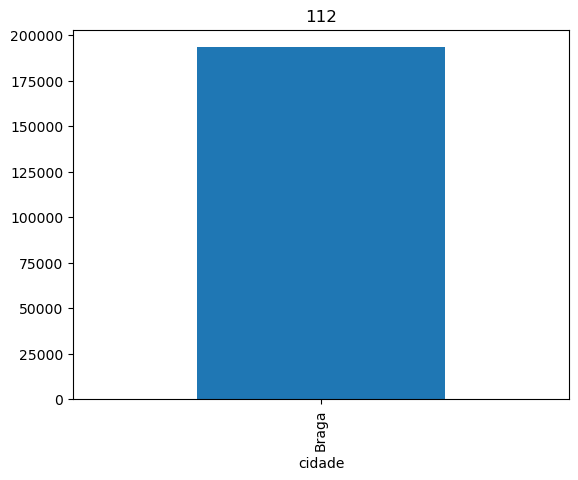

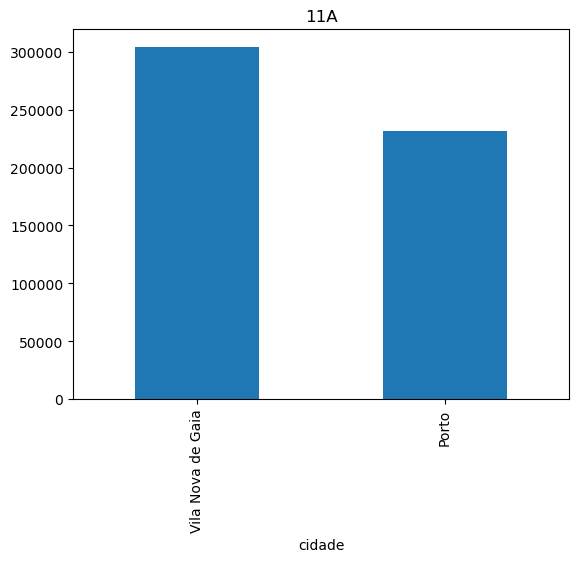

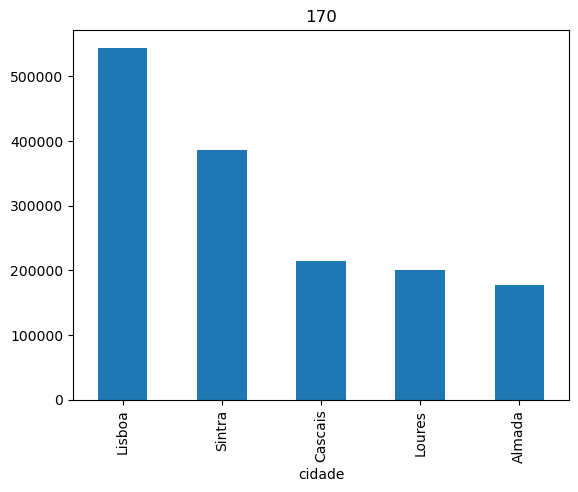

In [99]:
# Criar visualizacoes por grupo
import matplotlib.pyplot as plt

df5.set_index('cidade', inplace = True )
for group_name, group_data in df5.groupby('nuts3'):
    group_data['populacao'].plot(kind='bar', title=group_name)
    plt.show()

In [105]:
# para aplicar funcao dentro do grupo
# Function to calculate percentage change within each group
def calculate_relative_percentage(group,col_name):
    total_sum = group[col_name].sum()
    group['relative_percentage'] = (group[col_name] / total_sum) * 100
    return group

# Apply the custom analysis to each group
result_df = pd.DataFrame()
for name, group in df5.groupby('nuts3'):
    group = calculate_relative_percentage(group, 'populacao')
    result_df = pd.concat([result_df, group])

display('result_df')

,populacao,area,nuts3,nuts3_dsg,relative_percentage
cidade,,,,,
Braga,193324,41.0,112,Cávado,100.000000
Vila Nova de Gaia,304233,56.3,11A,Área Met. Porto,56.752794
Porto,231834,41.4,11A,Área Met. Porto,43.247206
Lisboa,544325,100.1,170,Área Met. Lisboa,35.720497
Sintra,385989,23.8,170,Área Met. Lisboa,25.329938
Cascais,214239,97.1,170,Área Met. Lisboa,14.059107
Loures,201349,11.8,170,Área Met. Lisboa,13.213221
Almada,177943,14.7,170,Área Met. Lisboa,11.677238


In [106]:
df5.groupby('nuts3')['populacao'].describe()

,count,mean,std,min,25%,50%,75%,max
nuts3,,,,,,,,
112,1.0,193324.0,NaN,193324.0,193324.00,193324.0,193324.00,193324.0
11A,2.0,268033.5,51193.823851,231834.0,249933.75,268033.5,286133.25,304233.0
170,5.0,304769.0,157289.523739,177943.0,201349.00,214239.0,385989.00,544325.0


## 3.1 Funções de Agregação

In [107]:
df5.groupby('nuts3')['populacao'].aggregate(["min", "median", "mean", "max"])

,min,median,mean,max
nuts3,,,,
112,193324,193324.0,193324.0,193324
11A,231834,268033.5,268033.5,304233
170,177943,214239.0,304769.0,544325


## 3.2 Utilização de Filtros

In [108]:
def filter_func(x):
    """Defino a função de filtro"""
    return x['populacao'].std() > 100000

# a função de filtro é aplicado ao grupo
df5.groupby('nuts3').filter(filter_func)

,populacao,area,nuts3,nuts3_dsg
cidade,,,,
Lisboa,544325,100.1,170,Área Met. Lisboa
Sintra,385989,23.8,170,Área Met. Lisboa
Cascais,214239,97.1,170,Área Met. Lisboa
Loures,201349,11.8,170,Área Met. Lisboa
Almada,177943,14.7,170,Área Met. Lisboa


In [109]:
df5.groupby('nuts3')['populacao'].std()

nuts3
112              NaN
11A     51193.823851
170    157289.523739
Name: populacao, dtype: float64

Também é comum é passar as colunas de mapeamento do dicionário para operações a serem aplicadas nessa coluna

In [110]:
df5.groupby('nuts3').aggregate({'populacao': 'min', 'area': 'max'})

,populacao,area
nuts3,,
112,193324,41.0
11A,231834,56.3
170,177943,100.1


## 3.3 Método Transform

A agregação normalmente retorna uma versão reduzida dos dados, enquanto a transformação pode retornar alguma versão transformada dos dados completos para recombinação.<br>
Na transformação, a saída tem o mesmo formato da entrada (shape 7,2) no nosso exemplo.

In [111]:
def center(x):
    return x - x.mean()

display("df5")
df5.groupby('nuts3')['populacao'].transform(center)

cidade
Braga                     0.0
Lisboa               239556.0
Sintra                81220.0
Cascais              -90530.0
Loures              -103420.0
Almada              -126826.0
Vila Nova de Gaia     36199.5
Porto                -36199.5
Name: populacao, dtype: float64

Na regressão é muitas vezes recomendado centrar as variáveis para que os predictors tenham média 0. <br>Isso torna mais fácil interpretar o termo de intercept como o valor esperado de Yi quando os valores dos predictors são definidos como as suas médias. 

## 3.4 Método Apply

In [116]:
def norm_by_area(x):
    # x is a DataFrame of group values
    x['populacao'] /= x['area'].sum()
    return x

df5.groupby('nuts3').apply(norm_by_area)

cidade    populacao   area nuts3         nuts3_dsg
nuts3                                                                 
112   0              Braga  4715.219512   41.0   112            Cávado
11A   6  Vila Nova de Gaia  3113.950870   56.3   11A   Área Met. Porto
      7              Porto  2372.917093   41.4   11A   Área Met. Porto
170   1             Lisboa  2199.292929  100.1   170  Área Met. Lisboa
      2             Sintra  1559.551515   23.8   170  Área Met. Lisboa
      3            Cascais   865.612121   97.1   170  Área Met. Lisboa
      4             Loures   813.531313   11.8   170  Área Met. Lisboa
      5             Almada   718.961616   14.7   170  Área Met. Lisboa

In [119]:
# com o group by por nuts3 somam-se as áreas da nuts3 
# por exemplo na 11A será 56.3 + 41.4 = 97.7
# como pop VNGaia = 304233 Porto = 231834 
print("Pop normalizada por nuts3 de {0} é {1}". format("VNGaia", 304233/97.7))
print("Pop normalizada por nuts3 de {0} é {1}". format("Porto", 231834/97.7))

Pop normalizada por nuts3 de VNGaia é 3113.950870010235
Pop normalizada por nuts3 de Porto é 2372.9170931422723


In [118]:
df5.groupby('cidade').apply(norm_by_area)

,,cidade,populacao,area,nuts3,nuts3_dsg
cidade,,,,,,
Almada,5,Almada,12104.965986,14.7,170,Área Met. Lisboa
Braga,0,Braga,4715.219512,41.0,112,Cávado
Cascais,3,Cascais,2206.374871,97.1,170,Área Met. Lisboa
Lisboa,1,Lisboa,5437.812188,100.1,170,Área Met. Lisboa
Loures,4,Loures,17063.474576,11.8,170,Área Met. Lisboa
Porto,7,Porto,5599.855072,41.4,11A,Área Met. Porto
Sintra,2,Sintra,16218.025210,23.8,170,Área Met. Lisboa
Vila Nova de Gaia,6,Vila Nova de Gaia,5403.783304,56.3,11A,Área Met. Porto


In [120]:
# com o group by por cidade não há lugar a somas... 
# as áreas são VNGaia = 56.3 Porto = 41.4 
# como pop VNGaia = 304233 Porto = 231834 
print("Pop normalizada por cidade de{0} é {1}". format("VNGaia", 304233/56.3))
print("Pop normalizada por cidade de{0} é {1}". format("Porto", 231834/41.4))

Pop normalizada por cidade deVNGaia é 5403.783303730018
Pop normalizada por cidade dePorto é 5599.855072463768


## 3.5 Diferenças entre Apply e Transform


- transform() pode receber uma função, uma função de string, uma lista de funções e um dicionário. No entanto, apply() só é pode receber uma função.
- transform() não pode produzir resultados agregados
- apply() funciona com várias séries ao mesmo tempo. No entanto, transform() só pode funcionar com uma  série de cada vez.

In [121]:
# Função de string
df5['populacao'].transform('sqrt')

0    439.686252
1    737.783844
2    621.280130
3    462.859590
4    448.719289
5    421.832905
6    551.573205
7    481.491433
Name: populacao, dtype: float64

In [122]:
# lista de funções
df5['area'].transform([np.sqrt, np.exp])

,sqrt,exp
0,6.403124,6.398435e+17
1,10.004999,2.970829e+43
2,4.878524,2.168746e+10
3,9.853933,1.479089e+42
4,3.435113,1.332524e+05
5,3.834058,2.421748e+06
6,7.503333,2.823445e+24
7,6.434283,9.545343e+17


In [123]:
# Dicionário
df5.transform({
    'populacao': np.sqrt,
    'area': np.exp,
})

,populacao,area
0,439.686252,6.398435e+17
1,737.783844,2.970829e+43
2,621.280130,2.168746e+10
3,462.859590,1.479089e+42
4,448.719289,1.332524e+05
5,421.832905,2.421748e+06
6,551.573205,2.823445e+24
7,481.491433,9.545343e+17


In [124]:
# Apply consegue produzir agregados
df5.apply(lambda x:x.sum())

cidade       BragaLisboaSintraCascaisLouresAlmadaVila Nova ...
populacao                                              2253236
area                                                     386.2
nuts3                                 11217017017017017011A11A
nuts3_dsg    CávadoÁrea Met. LisboaÁrea Met. LisboaÁrea Met...
dtype: object

In [125]:
## mas não funciona com o transform
df5.transform(lambda x:x.sum())

ValueError: Function did not transform

In [126]:
def subtract_two(x):
    return x['populacao'] - x['area']

In [127]:
# apply funciona com várias séries em simultâneo
df5.apply(subtract_two, axis=1)

0    193283.0
1    544224.9
2    385965.2
3    214141.9
4    201337.2
5    177928.3
6    304176.7
7    231792.6
dtype: float64

In [128]:
# mas o transform não
df5.transform(subtract_two, axis=1)

ValueError: Function did not transform

## 3.6 Especificar as Split Keys para os grupos
Nos exemplos apresentados anteriormente dividimos o DataFrame usando uma coluna. <br>
Esta é apenas uma das muitas opções pelas quais os grupos podem ser definidos. <br>
Pode ser uma lista, série ou index a especificar as keys pelas quais se faz o agrupamento. A **key** pode ser uma série ou lista com o comprimento da DataFrame.

In [129]:
L = [0, 1, 0, 1, 2, 0, 3, 1]
df5.groupby(L).sum()

,cidade,populacao,area,nuts3,nuts3_dsg
0,BragaSintraAlmada,757256,79.5,112170170,CávadoÁrea Met. LisboaÁrea Met. Lisboa
1,LisboaCascaisPorto,990398,238.6,17017011A,Área Met. LisboaÁrea Met. LisboaÁrea Met. Porto
2,Loures,201349,11.8,170,Área Met. Lisboa
3,Vila Nova de Gaia,304233,56.3,11A,Área Met. Porto


In [130]:
# forma mais verbosa equivalente ao que temos usado até agora
# aqui explictamos que a key é df5['nuts3'] e não apenas 'nuts3'
df5.groupby(df5['nuts3']).sum()

,cidade,populacao,area,nuts3_dsg
nuts3,,,,
112,Braga,193324,41.0,Cávado
11A,Vila Nova de GaiaPorto,536067,97.7,Área Met. PortoÁrea Met. Porto
170,LisboaSintraCascaisLouresAlmada,1523845,247.5,Área Met. LisboaÁrea Met. LisboaÁrea Met. Lisb...


também podemos usar um diciona´rio para fazer o mapeamento

In [131]:
df2g = df5.set_index('nuts3')
mapping = {'11A': 'norte', '112': 'norte', '170': 'centro'}
display('df2g', 'df2g.groupby(mapping).sum()')

,cidade,populacao,area,nuts3_dsg
nuts3,,,,
112,Braga,193324,41.0,Cávado
170,Lisboa,544325,100.1,Área Met. Lisboa
170,Sintra,385989,23.8,Área Met. Lisboa
170,Cascais,214239,97.1,Área Met. Lisboa
170,Loures,201349,11.8,Área Met. Lisboa
170,Almada,177943,14.7,Área Met. Lisboa
11A,Vila Nova de Gaia,304233,56.3,Área Met. Porto
11A,Porto,231834,41.4,Área Met. Porto
,cidade,populacao,area,nuts3_dsg


## 3.7 Pivot Tables

**Seaborn is a Python library** for data visualization. <br>
It provides quick access to small datasets, which is useful for documenting seaborn and reproducing bug reports. <br>
Seaborn supports several different dataset formats, including objects from the pandas or numpy libraries, as well as built-in Python types like lists and dictionaries.<br>
Seaborn's plotting functions operate on dataframes and arrays containing whole datasets, and its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean.<br>
 - Seaborn provides 18 datasets that are stored in a dedicated GitHub repository. <br>
 - To view all the available datasets in the Seaborn library, you can use the get_dataset_names() function.

In [132]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [133]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [134]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.7.1 Preparar manualmente a Pivot Table

In [135]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [137]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [138]:
titanic.pivot_table(index='sex', columns='class',
                    values='survived', aggfunc='mean', observed=True)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 3.7.2 Syntax Pivot Table

In [139]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [140]:
age_group = pd.cut(titanic['age'], [0, 18, 80])
age_group

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [141]:
# multilevel pivot table
titanic.pivot_table('survived', index=['sex', age_group], 
                    columns='class', aggfunc='mean')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# 4. Summary Statistics na DataFrame

In [142]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


todas estas funções estão disponíveis como fomos vendo nos exemplos anteriores

In [143]:
titanic.pivot_table('fare', index=['sex'], 
                    columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


para as variáveis categóricas minimo, máximo, média... não fazem sentido<br>
para estes caso temos a função **count**

In [144]:
titanic.pivot_table('survived', index=['class'], aggfunc='count')

,survived
class,
First,216
Second,184
Third,491
